In [1]:
import torch.nn as nn
import torch
import csv
import numpy as np
import matplotlib.pyplot as plt
import random
import perceptron as per
import FFBP
import method as m
import networkLayer as nl


## Aurora PA7

In [2]:
train = []
test = []

with open('nnfinaldataset.csv') as f:
    reader = csv.DictReader(f)
    for entry in reader:
        input_vector = [float(entry['LAC']), float(entry['SOW'])]
        output_vector = [float(entry['TACA'])]
        new_entry = {"Inputs": input_vector, "Output": output_vector}
        if int(entry["Data Item"]) % 2:
            train.append(new_entry)
        else:
            test.append(new_entry)
print(train)
print(test)


[{'Inputs': [0.9, 0.87], 'Output': [1.0]}, {'Inputs': [1.31, 0.75], 'Output': [1.0]}, {'Inputs': [2.48, 1.14], 'Output': [0.0]}, {'Inputs': [0.41, 1.87], 'Output': [0.0]}, {'Inputs': [2.45, 0.52], 'Output': [0.0]}, {'Inputs': [2.54, 2.97], 'Output': [1.0]}, {'Inputs': [0.07, 0.09], 'Output': [1.0]}, {'Inputs': [1.32, 1.96], 'Output': [0.0]}, {'Inputs': [0.94, 0.34], 'Output': [1.0]}, {'Inputs': [1.75, 2.21], 'Output': [0.0]}]
[{'Inputs': [1.81, 1.02], 'Output': [0.0]}, {'Inputs': [2.36, 1.6], 'Output': [0.0]}, {'Inputs': [2.17, 2.08], 'Output': [1.0]}, {'Inputs': [2.85, 2.91], 'Output': [1.0]}, {'Inputs': [1.05, 1.93], 'Output': [0.0]}, {'Inputs': [2.32, 1.73], 'Output': [0.0]}, {'Inputs': [1.86, 1.31], 'Output': [0.0]}, {'Inputs': [1.45, 2.19], 'Output': [0.0]}, {'Inputs': [0.28, 0.71], 'Output': [1.0]}, {'Inputs': [2.49, 1.52], 'Output': [0.0]}]


In [3]:
def method_1_aurora(network, dataset,  eta=1, iters=15):
    for _ in range(iters):
        for entry in dataset:
            inputs = entry["Inputs"]
            outputs = entry["Output"]
            network.train_step(inputs, eta, outputs)


In [4]:
def method_2_aurora(network, dataset, eta=1.0, iters=15):
    for entry in dataset:
        for _ in range(iters):
            inputs = entry["Inputs"]
            outputs = entry["Output"]
            network.train_step(inputs, eta, outputs)

In [5]:
def create_network_aurora(random_weights=False):
    if not random_weights:
        weights_hidden = [0.3, 0.3, 0.3, 0.3]
        weights_output = [0.8, 0.8]
    else:
        weights_hidden = [random.uniform(-1, 1) for _ in range(4)]
        weights_output = [random.uniform(-1, 1) for _ in range(4)]
    hidden_layer = nl.NodeLayer(2, weights_hidden, 0)
    output_layer = nl.NodeLayer(1, weights_output, 0)

    nn1 = FFBP.Network(hidden_layer, output_layer)
    return nn1

In [6]:
def threshhold(value, threshold):
    if value >= threshold:
        return 1
    else:
        return 0

In [7]:
def find_threshold(nn1, dataset): 
    max_thresh = 0 
    max_num_correct = 0
    for thresh in np.linspace(0, 1, 1000):
        curr_num_correct = 0
        
        for entry in dataset:
            inputs = entry["Inputs"]
            outputs = entry["Output"]
            if nn1.feed_forward(inputs)[0] > thresh:
                tmp_output = 1
            else:
                tmp_output = 0
            if tmp_output == outputs[0]: 
                curr_num_correct += 1
        if curr_num_correct > max_num_correct:
            max_thresh = thresh
            max_num_correct = curr_num_correct
   
    return max_thresh, max_num_correct

In [8]:
def calc_rocs(nn1, thresh, dataset):
    fn = 0
    fp = 0
    tp = 0 
    tn = 0 
   
    for entry in dataset:
        inputs = entry["Inputs"]
        outputs = entry["Output"]
        if threshhold(nn1.feed_forward(inputs)[0], thresh) == 0 and outputs[0] == 0:
            tn += 1
        if threshhold(nn1.feed_forward(inputs)[0], thresh) == 1 and outputs[0] == 1:
            tp += 1
        if threshhold(nn1.feed_forward(inputs)[0], thresh) == 1 and outputs[0] == 0:
            fp += 1
        if threshhold(nn1.feed_forward(inputs)[0], thresh) == 0 and outputs[0] == 1:
            fn += 1
    rocs = {"fn": fn, "fp": fp, "tp": tp, "tn": tn}
    return rocs

In [9]:
nn1 = create_network_aurora()
method_1_aurora(nn1, train, iters=30)
thresh, correct = find_threshold(nn1, train)

print(thresh, correct)
print(calc_rocs(nn1, thresh, test))
for entry in test:
    inputs = entry["Inputs"]
    outputs = entry["Output"]
    print(threshhold(nn1.feed_forward(inputs)[0], thresh) == outputs[0])

0.44044044044044045 9
{'fn': 2, 'fp': 0, 'tp': 1, 'tn': 7}
True
True
False
False
True
True
True
True
True
True


In [9]:

for i in range(20):
    print("="*20)
    nn1 = create_network_aurora(True)
    method_1_aurora(nn1, train, iters=1000)
    thresh, correct = find_threshold(nn1, train)
    
    #print(rocs)
    if correct == 10:
        #print(nn1, thresh)
        for entry in test:
            inputs = entry["Inputs"]
            outputs = entry["Output"]
            print(threshhold(nn1.feed_forward(inputs)[0], thresh) == outputs[0])
    print("="*20) 

{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 0, 'fp': 1, 'tp': 5, 'tn': 4}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 0, 'fp': 0, 'tp': 5, 'tn': 5}
True
True
True
True
True
True
True
True
True
True
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 0, 'fp': 1, 'tp': 5, 'tn': 4}
{'fn': 0, 'fp': 1, 'tp': 5, 'tn': 4}
{'fn': 0, 'fp': 0, 'tp': 5, 'tn': 5}
True
True
True
True
True
True
True
True
True
True
{'fn': 1, 'fp': 0, 'tp': 4, 'tn': 5}
{'fn': 0, 'fp': 0, 'tp': 5, 'tn': 5}
True
True
True
True
True
False
True
True
True
True


## pytorch tests

In [8]:
train = []
test = []

with open('nnfinaldataset.csv') as f:
    reader = csv.DictReader(f)
    for entry in reader:
        input_vector = torch.tensor([float(entry['LAC']), float(entry['SOW'])], dtype=float)
        output_vector = torch.tensor([float(entry['TACA'])], dtype=float)
        new_entry = {"Inputs": input_vector, "Output": output_vector}
        if int(entry["Data Item"]) % 2:
            train.append(new_entry)
        else:
            test.append(new_entry)
print(train)
print(test)

[{'Inputs': tensor([0.9000, 0.8700], dtype=torch.float64), 'Output': tensor([1.], dtype=torch.float64)}, {'Inputs': tensor([1.3100, 0.7500], dtype=torch.float64), 'Output': tensor([1.], dtype=torch.float64)}, {'Inputs': tensor([2.4800, 1.1400], dtype=torch.float64), 'Output': tensor([0.], dtype=torch.float64)}, {'Inputs': tensor([0.4100, 1.8700], dtype=torch.float64), 'Output': tensor([0.], dtype=torch.float64)}, {'Inputs': tensor([2.4500, 0.5200], dtype=torch.float64), 'Output': tensor([0.], dtype=torch.float64)}, {'Inputs': tensor([2.5400, 2.9700], dtype=torch.float64), 'Output': tensor([1.], dtype=torch.float64)}, {'Inputs': tensor([0.0700, 0.0900], dtype=torch.float64), 'Output': tensor([1.], dtype=torch.float64)}, {'Inputs': tensor([1.3200, 1.9600], dtype=torch.float64), 'Output': tensor([0.], dtype=torch.float64)}, {'Inputs': tensor([0.9400, 0.3400], dtype=torch.float64), 'Output': tensor([1.], dtype=torch.float64)}, {'Inputs': tensor([1.7500, 2.2100], dtype=torch.float64), 'Outp

In [9]:
input_1 = torch.tensor([1, 1], dtype=float)
output_1 = torch.tensor([0.9], dtype=float)
input_2 = torch.tensor([-1, -1], dtype=float)
output_2 = torch.tensor([0.05], dtype=float)
input_3 = torch.tensor([1, 2], dtype=float)
output_3 = torch.tensor([0.7], dtype=float)

In [10]:
def create_network(enable_bias=True):
    layer1 = nn.Linear(2,2, dtype=float, bias=enable_bias)
    if  enable_bias:
        nn.init.constant_(layer1.bias, 0.0)
    nn.init.constant_(layer1.weight, 0.3)
    layer2 = nn.Linear(2,1, dtype=float, bias=enable_bias) 
    nn.init.constant_(layer2.weight, 0.8)
    if enable_bias:
        nn.init.constant_(layer2.bias, 0.0)
    model = nn.Sequential(layer1, nn.Sigmoid(), layer2, nn.Sigmoid())
    return model

In [11]:
def loss_func(desired, expected):
    return 0.5*(desired - expected)**2

In [12]:
def train_atom(model, input_, desired, loss_func):
    for param in model.parameters():
        param.grad = None
    output = model(input_)
    loss = loss_func(desired, output)
    loss.backward()
    for param in model.parameters():
        param.data -= param.grad

In [13]:
def method1(model, dataset, loss_func, iters=15):
    for _ in range(iters):
        for entry in dataset:
            inputs = entry["Inputs"]
            output = entry["Output"]
            train_atom(model, inputs, output, loss_func)

In [14]:
def method2(model, dataset, loss_func, iters=15):
    for entry in dataset:
        for _ in range(iters):
            inputs = entry["Inputs"]
            output = entry["Output"]
            train_atom(model, inputs, output, loss_func)
    

In [15]:
# test
model = create_network()
dataset = [{"Inputs": input_1, "Output": output_1}, 
           {"Inputs": input_2, "Output": output_2}]
method1(model, dataset, loss_func)
model(input_1)
model(input_2)

tensor([0.3818], dtype=torch.float64, grad_fn=<SigmoidBackward0>)

In [16]:
model = create_network()
method2(model, dataset, loss_func)
model(input_1)
model(input_2)

tensor([0.2838], dtype=torch.float64, grad_fn=<SigmoidBackward0>)

In [17]:
model1 = create_network()
method2(model1, train, loss_func, iters=15)
for entry in test:
    inputs = entry["Inputs"]
    outputs = entry["Output"]
    print(model1(inputs))

tensor([0.2736], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2631], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2603], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2514], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2703], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2622], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2699], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2644], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2949], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2629], dtype=torch.float64, grad_fn=<SigmoidBackward0>)


tensor([0.2736], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2631], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2603], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2514], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2703], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2622], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2699], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2644], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2949], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([0.2629], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
9 0.2772772772772773


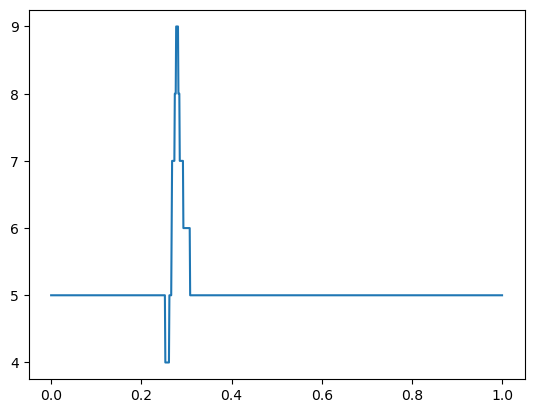

tensor([2.1700, 2.0800], dtype=torch.float64) tensor([1.], dtype=torch.float64) tensor([0.2603], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
tensor([2.8500, 2.9100], dtype=torch.float64) tensor([1.], dtype=torch.float64) tensor([0.2514], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
8


In [18]:
model1 = create_network()
method2(model1, train, loss_func, iters=15)
for entry in test:
    inputs = entry["Inputs"]
    outputs = entry["Output"]
    print(model1(inputs))

threshold_vals = np.linspace(0, 1, 1000)
tps = []
max_correct = 0
max_threshold = 0
for threshold in threshold_vals:
    correct = 0
    for value in train:
        inputs = value["Inputs"]
        output = value["Output"]
        network_output = model1(inputs)
        if network_output[0].item() > threshold and output[0].item() == 1.0:
            correct += 1
        if network_output[0].item() <= threshold and output[0].item() == 0.0: 
            correct += 1
    if correct > max_correct:
        max_correct = correct
        max_threshold = threshold
    tps.append(correct)
print(max_correct, max_threshold)
plt.plot(threshold_vals, tps)
plt.show()
correct = 0
for value in test:
    inputs = value["Inputs"]
    output = value["Output"]
    network_output = model1(inputs)
    if network_output[0].item() > max_threshold and output[0].item() == 1.0:
        correct += 1
    elif network_output[0].item() <= max_threshold and output[0].item() == 0.0: 
        correct += 1
    else: 
        print(inputs, output, network_output)
print(correct)

8 0.2828282828282829


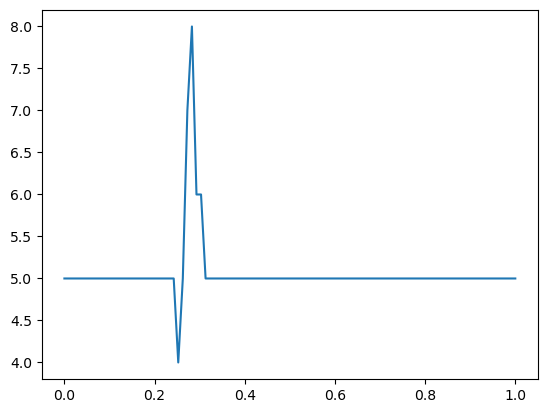

In [19]:
model2 = create_network()
method2(model2, train, loss_func, iters=15)
threshold_vals = np.linspace(0, 1, 100)
tps = []
max_correct = 0
max_threshold = 0
for threshold in threshold_vals:
    correct = 0
    for value in train:
        inputs = value["Inputs"]
        output = value["Output"]
        network_output = model2(inputs)
        if network_output[0].item() > threshold and output[0].item() == 1.0:
            correct += 1
        if network_output[0].item() <= threshold and output[0].item() == 0.0: 
            correct += 1
    if correct > max_correct:
        max_correct = correct
        max_threshold = threshold
    tps.append(correct)
print(max_correct, max_threshold)
plt.plot(threshold_vals, tps)
plt.show()

## First Pass

In [20]:
enable_bias = True
layer1 = nn.Linear(2,2, dtype=float, bias=enable_bias)
if  enable_bias:
    nn.init.constant_(layer1.bias, 0.0)
nn.init.constant_(layer1.weight, 0.3)
layer2 = nn.Linear(2,1, dtype=float, bias=enable_bias) 
nn.init.constant_(layer2.weight, 0.8)
if enable_bias:
    nn.init.constant_(layer2.bias, 0.0)
model = nn.Sequential(layer1, nn.Sigmoid(), layer2, nn.Sigmoid())
layers = [layer1, nn.Sigmoid(), layer2, nn.Sigmoid()]

model.train()
#output = what(input_3, layers)

#print(output)
output = model(input_3)
print(output)
loss = 0.5*(output_3 - output)**2
loss.backward()
#output = what(input_3, layers)
for i in range(15):
    for param in model.parameters():
        param.grad = None
    output = model(input_1)
    loss = 0.5*(output_1 - output)**2
    loss.backward()
    for param in model.parameters():
        param.data -= param.grad
    for param in model.parameters():
        param.grad = None
    output = model(input_2)
    loss = 0.5*(output_2 - output)**2
    loss.backward()
    for param in model.parameters():
        param.data -= param.grad
        
print('o1', model(input_1))
print('o2', model(input_2))
print('e1', 0.5*(output_1 - model(input_1))**2)
print('e2', 0.5*(output_2 - model(input_2))**2)

tensor([0.7572], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
o1 tensor([0.6583], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
o2 tensor([0.3818], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
e1 tensor([0.0292], dtype=torch.float64, grad_fn=<MulBackward0>)
e2 tensor([0.0550], dtype=torch.float64, grad_fn=<MulBackward0>)


In [21]:
enable_bias = True
layer1 = nn.Linear(2,2, dtype=float, bias=enable_bias)
if  enable_bias:
    nn.init.constant_(layer1.bias, 0.0)
nn.init.constant_(layer1.weight, 0.3)
layer2 = nn.Linear(2,1, dtype=float, bias=enable_bias) 
nn.init.constant_(layer2.weight, 0.8)
if enable_bias:
    nn.init.constant_(layer2.bias, 0.0)
model = nn.Sequential(layer1, nn.Sigmoid(), layer2, nn.Sigmoid())
layers = [layer1, nn.Sigmoid(), layer2, nn.Sigmoid()]

model.train()
#output = what(input_3, layers)

#print(output)
output = model(input_3)
print(output)
loss = 0.5*(output_3 - output)**2
loss.backward()
#output = what(input_3, layers)
for i in range(15):
    for param in model.parameters():
        param.grad = None
    output = model(input_1)
    loss = 0.5*(output_1 - output)**2
    loss.backward()
    for param in model.parameters():
        param.data -= param.grad
for i in range(15):
    for param in model.parameters():
        param.grad = None
    output = model(input_2)
    loss = 0.5*(output_2 - output)**2
    loss.backward()
    for param in model.parameters():
        param.data -= param.grad
        
print('o1', model(input_1))
print('o2', model(input_2))
print('e1', 0.5*(output_1 - model(input_1))**2)
print('e2', 0.5*(output_2 - model(input_2))**2)

tensor([0.7572], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
o1 tensor([0.4217], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
o2 tensor([0.2838], dtype=torch.float64, grad_fn=<SigmoidBackward0>)
e1 tensor([0.1144], dtype=torch.float64, grad_fn=<MulBackward0>)
e2 tensor([0.0273], dtype=torch.float64, grad_fn=<MulBackward0>)
